pytorch torch.no_grad() 与 requires_grad = False对比
- torch.no_grad()
    - 定义了一个上下文管理器，隐式地不进行梯度更新（阻止梯度计算），不会改变 requires_grad
    - 适用于eval阶段，或 model forward 的过程中某些模块不更新梯度的模块（此时这些模块仅进行特征提取（前向计算），不反向更新）
- param.requires_grad
    - 显式的frozen掉一些modules（layer）的梯度更新，然后训练剩下部分的参数
    - layer /model 级别
    - 可能更加灵活

In [1]:
import torch
from transformers import BertModel
from torch import nn

In [4]:
model_name = 'bert-base-uncased'
bert = BertModel.from_pretrained(model_name)

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [5]:
def calc_learnable_params(model):
    total_param = 0
    for name, param in model.named_parameters():
        if param.requires_grad:
            total_param += param.numel()
    return total_param

In [6]:
calc_learnable_params(bert)

109482240

In [ ]:
with torch.no_grad():
    print(calc_learnable_params(bert))#对参数量无影响

109482240


In [9]:
for name, param in bert.named_parameters():
        if param.requires_grad:
            param.requires_grad = False

In [ ]:
calc_learnable_params(bert)  # param.requires_grad 真正改变了

0

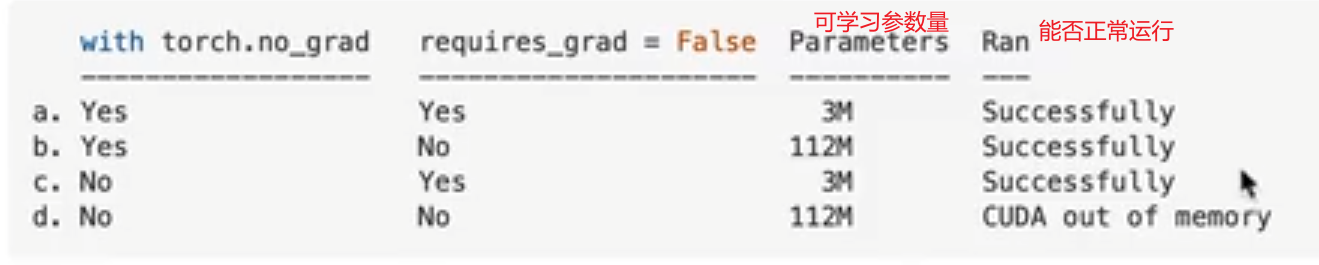
开启with torch.no_grad, 模型不会有任何的梯度被存储。
运行失败时存储了全量参数的梯度导致显存爆照